In [1]:
pwd

'C:\\Users\\Surface'

## Introduction to Dataset:
This dataset consists of petrophysical well logs from several wells. This is a relational dataset. You need to prepare data step by step as mentioned below and try to extract some insights and valuable information.
- DEPTH_MD: This column is measured depth in meter. (Continuous data)
- WELL: Well name (Categorical data)
- X_LOC: Geographical X location in UTM system. (Continuous data)
- Y_LOC: Geographical Y location in UTM system. (Continuous data)
- GROUP: The interval of rocks that can include several FORMATION (Categorical data)
- FORMATION: The interval of rocks that has geological special meaning (Categorical data)
- DTC: This log is a measurement of acoustic wave in rocks inside oil and gas well (Continuous data)
- PEF: This is photoelectric log helping to recognize lithology (Continuous data)
- NPHI: This is a Neutron log for porosity evaluation. (Continuous data)
- RHOB: This is rock medium density measurements(Continuous data)
- lithology_name: type of the rocks (Categorical data)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Import Data

In [2]:
df = pd.read_csv('well_data.csv')

In [3]:
df.head()

,DEPTH_MD,WELL,X_LOC,Y_LOC,GROUP,FORMATION,DTC,PEF,NPHI,RHOB,lithology_name
0,869.208,W0913,437642.0625,6470974.0,NORDLAND GP.,Utsira Fm.,140.845428,1.453022,0.419031,2.076638,Shale
1,869.968,W0913,437642.0625,6470974.0,NORDLAND GP.,Utsira Fm.,144.230087,1.441285,0.425482,2.010360,Sandstone
2,870.728,W0913,437642.0625,6470974.0,NORDLAND GP.,Utsira Fm.,145.840134,1.457139,0.436616,2.009847,Sandstone
3,871.488,W0913,437642.0313,6470974.0,NORDLAND GP.,Utsira Fm.,145.741058,1.322686,0.514372,1.521392,Sandstone
4,872.248,W0913,437642.0313,6470974.0,NORDLAND GP.,Utsira Fm.,NaN,NaN,NaN,1.609095,Sandstone


In [4]:
df.tail()

,DEPTH_MD,WELL,X_LOC,Y_LOC,GROUP,FORMATION,DTC,PEF,NPHI,RHOB,lithology_name
11178,4100.137436,W0204,482078.2500,6847164.5,DUNLIN GP.,Statfjord Fm.,81.683586,4.618176,0.191501,2.511264,Shale
11179,4100.897436,W0204,482078.3125,6847164.5,DUNLIN GP.,Statfjord Fm.,81.818054,4.756323,0.314873,2.492342,Sandstone
11180,4101.657436,W0204,482078.3750,6847164.5,DUNLIN GP.,Statfjord Fm.,81.847351,4.571058,0.340838,2.502546,Sandstone
11181,4102.417436,W0204,482078.4375,6847164.5,DUNLIN GP.,Statfjord Fm.,101.491325,6.626430,0.414516,2.379578,Sandstone
11182,4103.177436,W0204,482078.5000,6847164.5,DUNLIN GP.,Statfjord Fm.,88.571071,12.839459,0.355905,2.500079,Sandstone


## Exploratory Data Analysis

In [5]:
df['lithology_name'].unique()

array(['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', nan, 'Chalk'], dtype=object)

<Figure size 720x576 with 0 Axes>

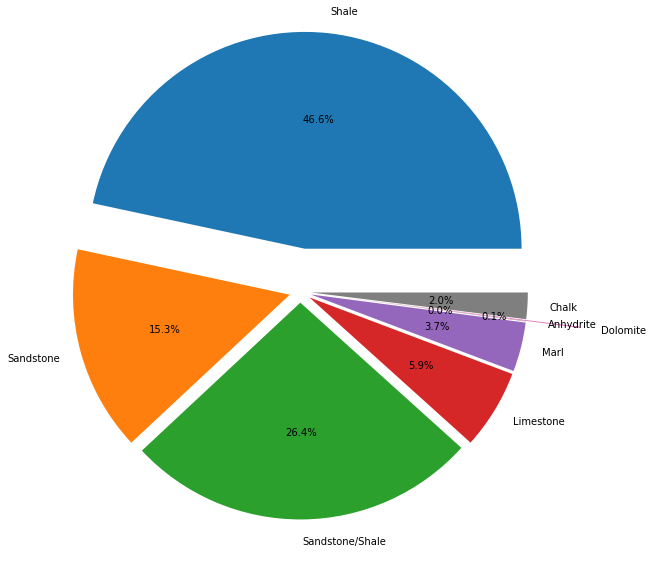

<Figure size 720x576 with 0 Axes>

In [6]:
df['lithology_name'].unique()
A = df[df['lithology_name'] == 'Shale']['lithology_name'].count()
B = df[df['lithology_name'] == 'Sandstone']['lithology_name'].count()
C = df[df['lithology_name'] == 'Sandstone/Shale']['lithology_name'].count()
D = df[df['lithology_name'] == 'Limestone']['lithology_name'].count()
E = df[df['lithology_name'] == 'Marl']['lithology_name'].count()
F = df[df['lithology_name'] == 'Anhydrite']['lithology_name'].count()
G = df[df['lithology_name'] == 'Dolomite']['lithology_name'].count()
H = df[df['lithology_name'] == 'Chalk']['lithology_name'].count()
pie_data = [A,B,C,D,E,F,G,H]
pie_data
labels= ['Shale','Sandstone','Sandstone/Shale',  'Limestone', 'Marl', 'Anhydrite', 'Dolomite', 'Chalk']

myexplode = [0.2, 0.05, 0.05, 0.05,0.05,0.05,0.3, 0.05]
plt.figure(figsize = (10,8))
plt.pie(pie_data, labels= labels, explode = myexplode, autopct='%1.1f%%')
plt.tight_layout()
plt.figure(figsize = (10,8))

In [7]:
df.describe()

,DEPTH_MD,X_LOC,Y_LOC,DTC,PEF,NPHI,RHOB
count,11183.000000,11183.000000,1.118300e+04,11118.000000,11130.000000,11120.000000,11143.000000
mean,2291.844464,453985.717644,6.590754e+06,117.721368,4.058413,0.379076,2.218300
std,764.484477,20197.940783,1.732961e+05,31.032229,2.158162,0.123957,0.247333
min,869.208000,436790.843800,6.429286e+06,30.353481,1.011461,-0.235535,1.500153
25%,1683.936718,436813.593800,6.463013e+06,91.138182,2.632901,0.291939,2.009836
50%,2241.008000,437640.687500,6.470982e+06,117.697723,3.319412,0.393674,2.205459
75%,2865.718193,482061.171900,6.847156e+06,145.932335,4.878673,0.479975,2.453044
max,4103.177436,482080.218800,6.847174e+06,652.939621,32.089067,0.699346,2.910462


In [8]:
df.isnull().sum()

DEPTH_MD           0
WELL               0
X_LOC              0
Y_LOC              0
GROUP              0
FORMATION         11
DTC               65
PEF               53
NPHI              63
RHOB              40
lithology_name    37
dtype: int64

<AxesSubplot:>

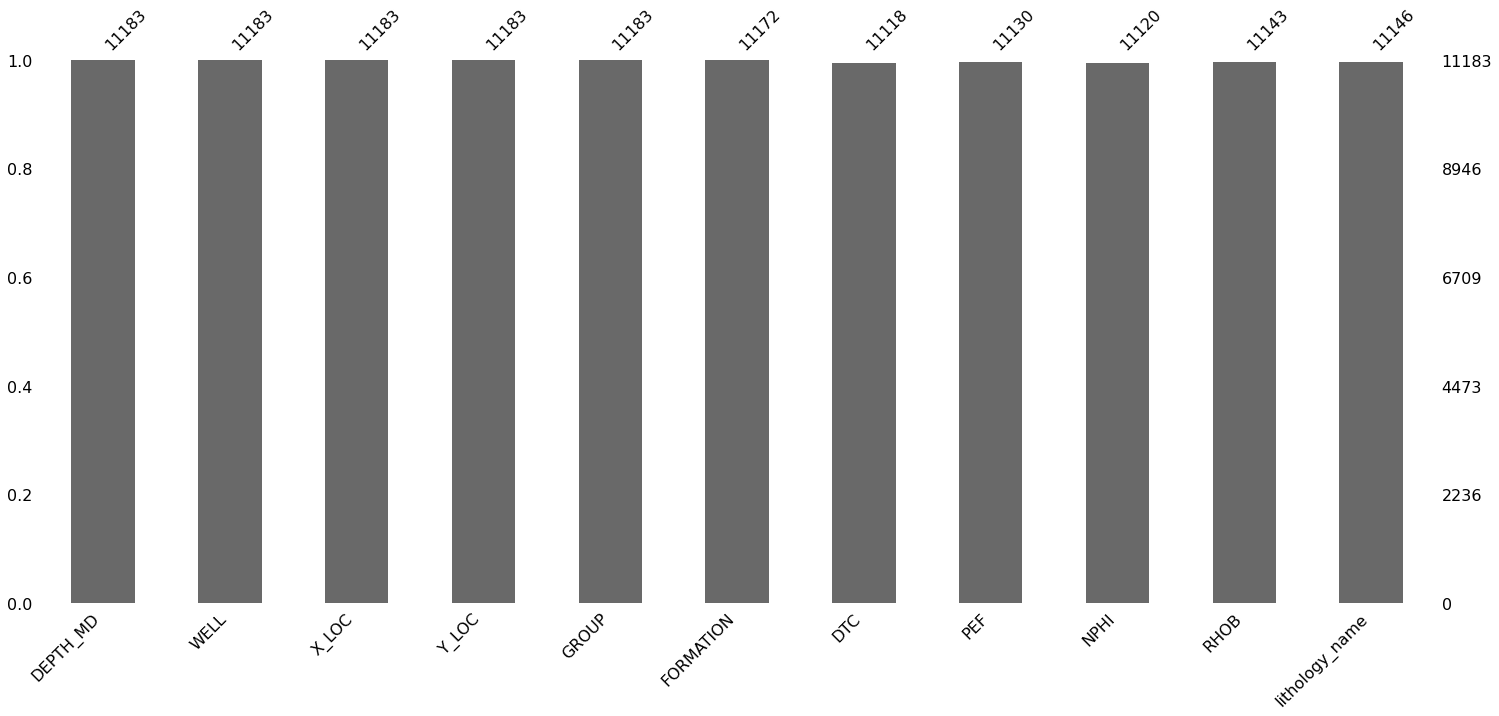

In [9]:
import missingno
missingno.bar(df)

In [10]:
df.duplicated().sum()

0

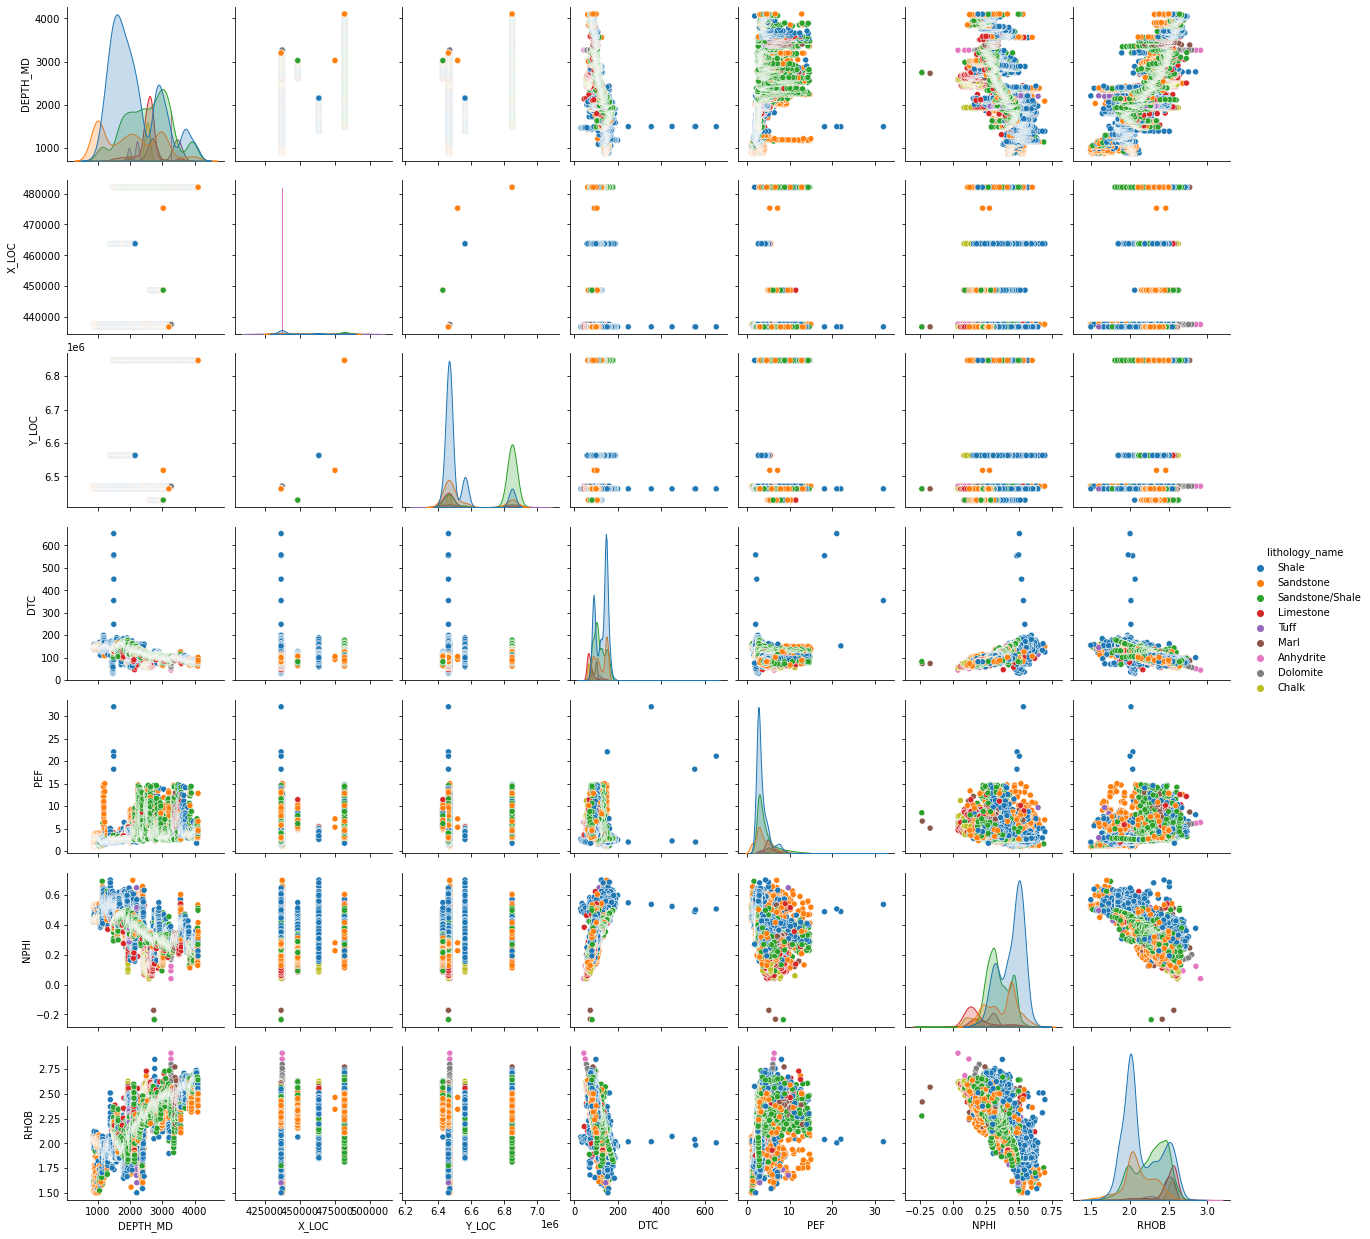

In [11]:
sns.pairplot(df, hue = 'lithology_name')

In [12]:
df.columns

Index(['DEPTH_MD', 'WELL', 'X_LOC', 'Y_LOC', 'GROUP', 'FORMATION', 'DTC',
       'PEF', 'NPHI', 'RHOB', 'lithology_name'],
      dtype='object')

In [13]:
categorical_dataset = df[['WELL','GROUP', 'FORMATION','lithology_name']]

In [14]:
numerical_datasets = df[['DEPTH_MD','X_LOC', 'Y_LOC','DTC','PEF', 'NPHI', 'RHOB']]

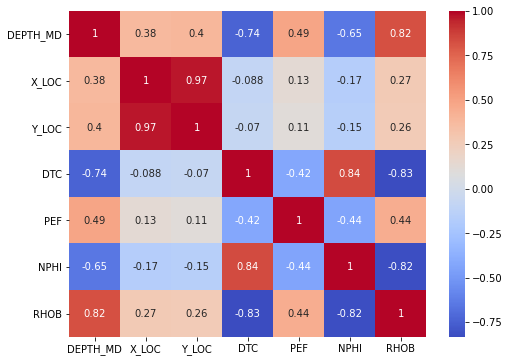

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(method='pearson'), annot = True, cmap = 'coolwarm')
plt.show()

## Burning Questions

#### How many rows and columns data has?

In [16]:
df.shape
# rows = 11183, columns = 11 

(11183, 11)

#### What kind of data type is not available in dataset?

In [17]:
df.dtypes
#absent dtypes are: bool, numeric-integer, numeric-complex 

DEPTH_MD          float64
WELL               object
X_LOC             float64
Y_LOC             float64
GROUP              object
FORMATION          object
DTC               float64
PEF               float64
NPHI              float64
RHOB              float64
lithology_name     object
dtype: object

#### How many null values we have in dataset in total?

In [18]:
df.isnull().sum()

DEPTH_MD           0
WELL               0
X_LOC              0
Y_LOC              0
GROUP              0
FORMATION         11
DTC               65
PEF               53
NPHI              63
RHOB              40
lithology_name    37
dtype: int64

#### Delete all rows that these column values all missing: (DTC, PEF, NPHI, RHOB, lithology_name). What is the shape of dataset after deleting? Hint: this is very important step: DO NOT delete a row(s) that one, two, three, or four of those logs have null values. It must all 5 columns should be missing in that row

In [19]:
df[df[['DTC', 'PEF', 'NPHI', 'RHOB','lithology_name']] == np.nan].count()

DEPTH_MD          0
WELL              0
X_LOC             0
Y_LOC             0
GROUP             0
FORMATION         0
DTC               0
PEF               0
NPHI              0
RHOB              0
lithology_name    0
dtype: int64

#### Fill the NULL values in each column based on the mean value of that column. (Use fill forward approach ‘ffill’ to fill missing values in FORMATION column)

In [20]:
df[['DTC', 'PEF', 'NPHI', 'RHOB']].mean()

DTC     117.721368
PEF       4.058413
NPHI      0.379076
RHOB      2.218300
dtype: float64

In [21]:
#Before filling NaN Values
df.isnull().sum()

DEPTH_MD           0
WELL               0
X_LOC              0
Y_LOC              0
GROUP              0
FORMATION         11
DTC               65
PEF               53
NPHI              63
RHOB              40
lithology_name    37
dtype: int64

In [22]:
#(Use fill forward approach ‘ffill’ to fill missing values in FORMATION column)
df.fillna(value= {'DTC':117.721368, 'PEF': 4.058413, 'NPHI': 0.379076, 'RHOB':2.218300}, inplace = True)

In [23]:
df.ffill(inplace= True )

In [25]:
#After filling NaN Values
df.isnull().sum()

DEPTH_MD          0
WELL              0
X_LOC             0
Y_LOC             0
GROUP             0
FORMATION         0
DTC               0
PEF               0
NPHI              0
RHOB              0
lithology_name    0
dtype: int64

#### How many unique wells do we have in dataset?

In [26]:
df.WELL.value_counts()

W0204    3438
W0913    3161
W0915    3019
W1105    1012
W1005     553
Name: WELL, dtype: int64

#### How many unique lithology_name is in dataset?

In [27]:
df.lithology_name.nunique()

9

#### Which one is the least frequent? Answer is: Anhydrite

In [28]:
df.lithology_name.value_counts()

Shale              5177
Sandstone/Shale    2915
Sandstone          1696
Limestone           655
Marl                405
Chalk               217
Tuff                106
Dolomite              9
Anhydrite             3
Name: lithology_name, dtype: int64

#### What is the x and y coordinate for each well? (compute mean value of X_loc, Y_loc for each well)

In [29]:
df.groupby('WELL')['X_LOC'].mean()

WELL
W0204    482071.286610
W0913    437624.954509
W0915    436807.608537
W1005    448798.324899
W1105    463756.000000
Name: X_LOC, dtype: float64

In [30]:
df.groupby('WELL')['Y_LOC'].mean()

WELL
W0204    6.847165e+06
W0913    6.470980e+06
W0915    6.463004e+06
W1005    6.429616e+06
W1105    6.562935e+06
Name: Y_LOC, dtype: float64

#### What is the min, max, mean value of DTC in FORMATION ‘Utsira Fm.’ In whole dataset?

In [31]:
df[df['FORMATION'] == 'Utsira Fm.']['DTC'].min()

30.35348129

In [32]:
df[df['FORMATION'] == 'Utsira Fm.']['DTC'].max()

652.939621

In [33]:
df[df['FORMATION'] == 'Utsira Fm.']['DTC'].mean()

147.62009742884928

#### What is the min, max, mean value of NPHI in FORMATION ‘Utsira Fm.’ In the WELL ‘’ W0204?

In [34]:
df[(df['FORMATION'] == 'Utsira Fm.') & (df['WELL'] == 'W0204')]['DTC'].min()

102.1994934

In [35]:
df[(df['FORMATION'] == 'Utsira Fm.') & (df['WELL'] == 'W0204')]['DTC'].max()

179.7122498

In [36]:
df[(df['FORMATION'] == 'Utsira Fm.') & (df['WELL'] == 'W0204')]['DTC'].mean()

150.48782664097558

#### Create a function to calculate porosity from RHOB using this equation as fraction (do not multiply by 100 to convert percent).

#### Create new column called [‘Den_por’] and apply the function to calculate porosity in that column. Hint: you can use apply() function.

In [37]:
df['Den_por'] = df['RHOB'].apply(lambda X: (2.71 - X) / (2.71 - 1))
df['Den_por']

0        0.370387
1        0.409146
2        0.409446
3        0.695092
4        0.643804
           ...   
11178    0.116220
11179    0.127285
11180    0.121318
11181    0.193229
11182    0.122761
Name: Den_por, Length: 11183, dtype: float64

In [38]:
df.head()

,DEPTH_MD,WELL,X_LOC,Y_LOC,GROUP,FORMATION,DTC,PEF,NPHI,RHOB,lithology_name,Den_por
0,869.208,W0913,437642.0625,6470974.0,NORDLAND GP.,Utsira Fm.,140.845428,1.453022,0.419031,2.076638,Shale,0.370387
1,869.968,W0913,437642.0625,6470974.0,NORDLAND GP.,Utsira Fm.,144.230087,1.441285,0.425482,2.010360,Sandstone,0.409146
2,870.728,W0913,437642.0625,6470974.0,NORDLAND GP.,Utsira Fm.,145.840134,1.457139,0.436616,2.009847,Sandstone,0.409446
3,871.488,W0913,437642.0313,6470974.0,NORDLAND GP.,Utsira Fm.,145.741058,1.322686,0.514372,1.521392,Sandstone,0.695092
4,872.248,W0913,437642.0313,6470974.0,NORDLAND GP.,Utsira Fm.,117.721368,4.058413,0.379076,1.609095,Sandstone,0.643804


#### Calculate ‘PHIT’ (total porosity) column using lambda function using this equation:
(‘NPHI’ + ‘Den_por’)/2

In [39]:
df.NPHI.size, df.Den_por.size

(11183, 11183)

In [53]:
total_porosity = ((df['NPHI']+ df['Den_por']) / 2)
total_porosity

0        0.394709
1        0.417314
2        0.423031
3        0.604732
4        0.511440
           ...   
11178    0.153861
11179    0.221079
11180    0.231078
11181    0.303873
11182    0.239333
Length: 11183, dtype: float64

In [54]:
#X = df['NPHI']
#Z = df['Den_por']

#total_porosity = lambda X,Z: (X+Z)/2

print(total_porosity)

0        0.394709
1        0.417314
2        0.423031
3        0.604732
4        0.511440
           ...   
11178    0.153861
11179    0.221079
11180    0.231078
11181    0.303873
11182    0.239333
Length: 11183, dtype: float64


In [55]:
df['PHIT'] = total_porosity
df['PHIT']

0        0.394709
1        0.417314
2        0.423031
3        0.604732
4        0.511440
           ...   
11178    0.153861
11179    0.221079
11180    0.231078
11181    0.303873
11182    0.239333
Name: PHIT, Length: 11183, dtype: float64

In [56]:
df.head()

,DEPTH_MD,WELL,X_LOC,Y_LOC,GROUP,FORMATION,DTC,PEF,NPHI,RHOB,lithology_name,Den_por,PHIT
0,869.208,W0913,437642.0625,6470974.0,NORDLAND GP.,Utsira Fm.,140.845428,1.453022,0.419031,2.076638,Shale,0.370387,0.394709
1,869.968,W0913,437642.0625,6470974.0,NORDLAND GP.,Utsira Fm.,144.230087,1.441285,0.425482,2.010360,Sandstone,0.409146,0.417314
2,870.728,W0913,437642.0625,6470974.0,NORDLAND GP.,Utsira Fm.,145.840134,1.457139,0.436616,2.009847,Sandstone,0.409446,0.423031
3,871.488,W0913,437642.0313,6470974.0,NORDLAND GP.,Utsira Fm.,145.741058,1.322686,0.514372,1.521392,Sandstone,0.695092,0.604732
4,872.248,W0913,437642.0313,6470974.0,NORDLAND GP.,Utsira Fm.,117.721368,4.058413,0.379076,1.609095,Sandstone,0.643804,0.511440


#### What is the min, max, mean value of PHIT in FORMATION ‘Lista Fm.’ in the WELL ‘’ W0913”?

In [57]:
df[(df['FORMATION'] == 'Lista Fm.') & (df['WELL'] == 'W0913')]['PHIT'].min()

0.3226197639678362

In [58]:
df[(df['FORMATION'] == 'Lista Fm.') & (df['WELL'] == 'W0913')]['PHIT'].max()

0.6602310445964912

In [59]:
df[(df['FORMATION'] == 'Lista Fm.') & (df['WELL'] == 'W0913')]['PHIT'].mean()

0.5053825394850018

#### Find the outliers for DTC, PEF, and NPHI, quantitatively. How many outliers are there for each feature? Which Well has the least outliers?

In [60]:
print('The outliers numbers for DTC is: ', df[(25 < df['DTC']) & (df['DTC'] > 250)]['DTC'].count())

The outliers numbers for DTC is:  5


In [61]:
df[(25 < df['DTC']) & (df['DTC'] > 250)]['DTC']

3964    554.183075
3965    354.458328
3966    652.939621
3970    558.033463
3971    449.934052
Name: DTC, dtype: float64

In [62]:
df[(25 < df['DTC']) & (df['DTC'] > 250)]['WELL']

3964    W0915
3965    W0915
3966    W0915
3970    W0915
3971    W0915
Name: WELL, dtype: object

<AxesSubplot:>

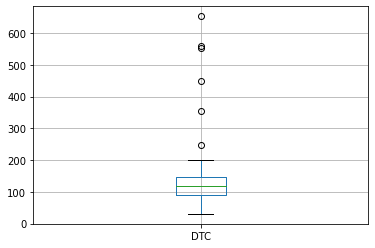

In [64]:
#Boxplot Methodolgy to view possible outliers
df.boxplot(column = 'DTC')

In [65]:
print('The outliers numbers for PEF is: ', df[(1 < df['PEF']) & (df['PEF'] > 15)]['PEF'].count())

The outliers numbers for PEF is:  4


In [66]:
df[(1 < df['PEF']) & (df['PEF'] > 15)]['PEF']

3963    22.067261
3964    18.210827
3965    32.089067
3966    21.103240
Name: PEF, dtype: float64

In [67]:
df[(1 < df['PEF']) & (df['PEF'] > 15)]['WELL']

3963    W0915
3964    W0915
3965    W0915
3966    W0915
Name: WELL, dtype: object

<AxesSubplot:>

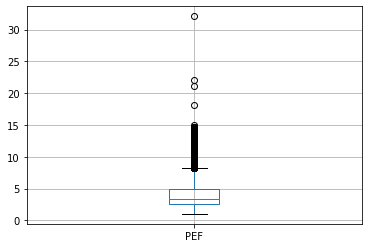

In [68]:
df.boxplot(column = 'PEF')

In [69]:
print('The outliers numbers for NPHI is: ', df[(-0.15 < df['NPHI']) & (df['NPHI'] > 0.65)]['NPHI'].count())

The outliers numbers for NPHI is:  8


In [70]:
df[(-0.15 < df['NPHI']) & (df['NPHI'] > 0.65)]['NPHI']

357     0.690551
367     0.653731
1601    0.697367
1998    0.656211
6733    0.654904
6734    0.684932
6735    0.699346
6736    0.680164
Name: NPHI, dtype: float64

In [71]:
df[(-0.15 < df['NPHI']) & (df['NPHI'] > 0.65)]['WELL']

357     W0913
367     W0913
1601    W0913
1998    W0913
6733    W1105
6734    W1105
6735    W1105
6736    W1105
Name: WELL, dtype: object

<AxesSubplot:>

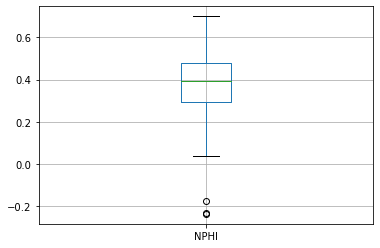

In [72]:
df.boxplot(column = 'NPHI')

In [73]:
print('Well W0913 & Well W1105 have the least outliers of 4')

Well W0913 & Well W1105 have the least outliers of 4


#### Which Group has the most """various"""" FORMATION in dataset?

In [74]:
df.groupby('GROUP')['FORMATION'].value_counts()

GROUP             FORMATION            
CROMER KNOLL GP.  Roedby Fm.                336
                  Aasgard Fm.               175
                  Sola Fm.                   67
                  Tuxen Fm.                  43
                  Blodoeks Fm.               42
                  Lista Fm.                  20
DUNLIN GP.        Drake Fm.                 270
                  Cook Fm.                  145
                  Amundsen Fm.              120
                  Statfjord Fm.              53
                  Burton Fm.                 51
HEGRE GP.         Skagerrak Fm.             495
HORDALAND GP.     Utsira Fm.               3117
                  Skade Fm.                 359
                  Frigg Fm.                 238
NORDLAND GP.      Utsira Fm.                749
                  Smith Bank Fm.              1
ROGALAND GP.      Lista Fm.                 406
                  Sele Fm.                  291
                  Balder Fm.                222


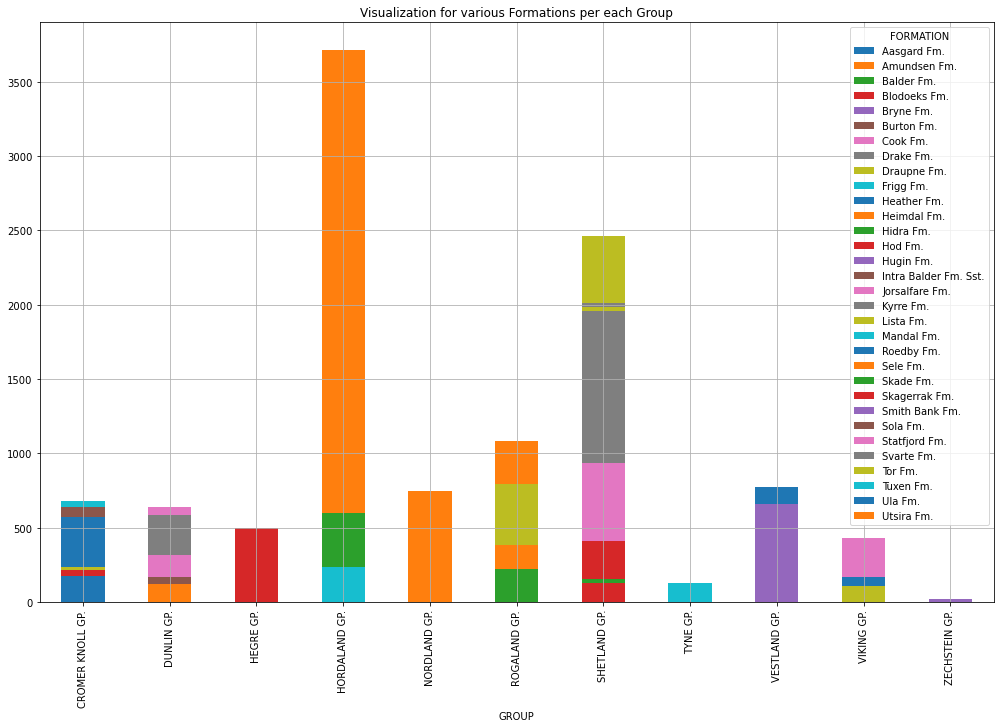

In [75]:
df.groupby('GROUP')['FORMATION'].value_counts().unstack().plot(kind = 'bar', stacked=True, figsize = (14,10), legend= True)
plt.plot()
plt.grid()
plt.tight_layout()
plt.title('Visualization for various Formations per each Group')
plt.show()

#### SHETLAND GP. has the the most various formations
## Thank you!